In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [12]:
iris = load_iris(as_frame=True)
df = iris.frame # converti le dataset en DataFrame

df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
df.shape

(150, 5)

In [13]:
df["target"].nunique() # permet de connaître le nombre de modalité pour notre classification

3

In [14]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop("target", axis=1).values # Features (variables explicatives)
y = df["target"].values # Labels (variable cible)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # permet de séparer les données d'entrainement et de test

print(X_train.shape, y_train.shape)



(120, 4) (120,)


In [30]:
model = KNeighborsClassifier()

model.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
print(f"Train set : {model.score(X_train, y_train)}")
print(f"Test set : {model.score(X_test, y_test)}")

Train set : 0.9666666666666667
Test set : 1.0


In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
cross_val_score(KNeighborsClassifier(5), X_train, y_train, cv=5, scoring="accuracy").mean()

np.float64(0.9416666666666667)

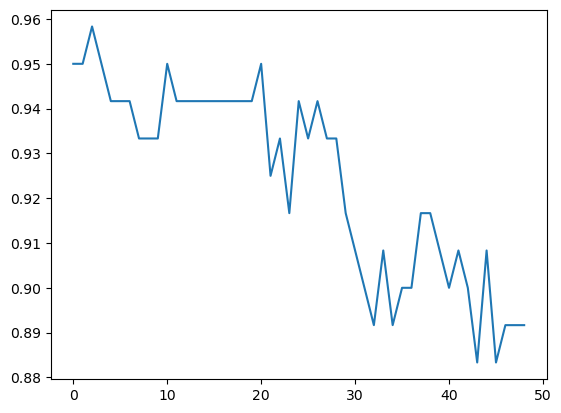

In [34]:
val_score = []

for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5, scoring="accuracy").mean()
    val_score.append(score)
plt.plot(val_score)

In [35]:
from sklearn.model_selection import validation_curve

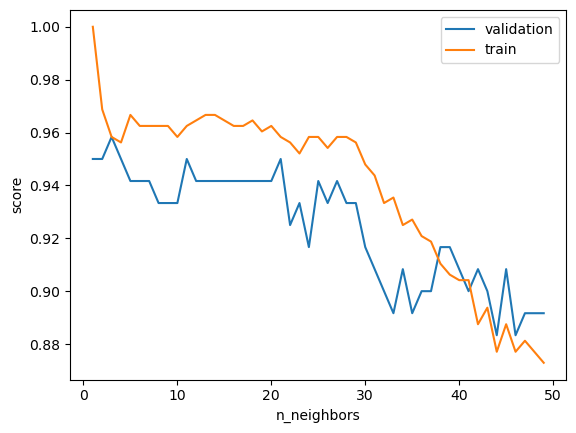

In [36]:
model = KNeighborsClassifier()
k = np.arange(1,50)

train_score, val_score = validation_curve(model, X_train, y_train, param_name="n_neighbors", param_range=k, cv=5)

plt.plot(k, val_score.mean(axis=1), label = "validation")
plt.plot(k, train_score.mean(axis=1), label = "train")

plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.legend()

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = {
    "n_neighbors" : np.arange(1,20),
    "metric" : ["euclidean","manhattan"]
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [39]:
grid.best_score_

np.float64(0.9666666666666666)

In [40]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': np.int64(14)}

In [41]:
model = grid.best_estimator_

In [42]:
model.score(X_test, y_test)

1.0

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_test, model.predict(X_test))

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [45]:
from sklearn.model_selection import learning_curve

[ 9 19 28 38 48 57 67 76 86 96]


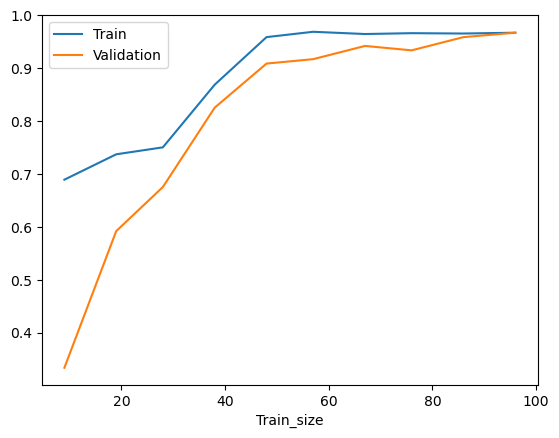

In [46]:
N, train_score, val_score = learning_curve(model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1,1,10))

print(N)
plt.plot(N, train_score.mean(axis=1), label = "Train")
plt.plot(N, val_score.mean(axis=1), label = "Validation")
plt.xlabel("Train_size")
plt.legend()